In [ ]:
# Exc 06: Classification

In [1]:
# imports
import pandas as pd
import numpy as np


In [ ]:
data_zopa = pd.read_csv("../data/zsnew.csv")

In [19]:
data_zopa.default

0        0
1        0
2        0
3        0
4        1
        ..
19995    0
19996    1
19997    0
19998    0
19999    0
Name: default, Length: 20000, dtype: int64

In [18]:
data_zopa.defdate

dtype('O')

In [48]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data_zopa)

In [49]:
data_train.default.describe()

count    15000.000000
mean         0.083000
std          0.275891
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default, dtype: float64

In [50]:
def_len = int(data_train.default.mean()*len(data_train.default))
def_len

1245

In [1]:
from sklearn.utils import resample
train_downsampled = resample(data_train.loc[data_train['default']==0], replace=True, n_samples=def_len, random_state=42)

NameError: name 'data_train' is not defined

In [52]:
train_downsampled

,Unnamed: 0,Encrypted.Loan.ID,Encrypted.Borrower.ID,date.start,last.date,defdate,amount,pri.coll,int.coll,numpay,...,FV,MIRR,DD,time.start,time.end,RINV,MIRR2,FV2,amount_ln,time.start2
484,530774,KTjJvL+AgTnEzo3hU1K+dX7Qz19n7lfVpjMj6dsfjBlOKh...,KCQg2fV9Fcg3kriIl/p1MKbQz19n7lfVpjMj6dsfjBlOKh...,2014-07-08,2016-07-29,NaN,2700.0,2700.0,394.388375,24,...,3126.890035,7.384581,752,3413,4165,5.033478,9.407905,3249.486889,7.901007,1164.8569
7957,49811,KWC7gQf0iU8MPVn6gTcIsK3ptx0foLOYJfyrpB9PEuf4Gf...,KwDXmGiRaSbQ9cjc3fCTbl3ptx0foLOYJfyrpB9PEuf4Gf...,2013-08-14,2016-09-08,NaN,4820.0,4820.0,496.610000,36,...,5386.325000,3.683308,1121,3085,4206,5.590457,6.051099,5773.113000,8.480529,951.7225
9108,712487,KdPauy4Vb0HmA/RP03sldBKyy4I2D8EqXUvTWa8VoTJ5KU...,KBGvWHiu46KMjyn2I+fotgqyy4I2D8EqXUvTWa8VoTJ5KU...,2012-04-30,2013-10-08,NaN,4190.0,4190.0,293.850000,18,...,4540.580000,5.734277,526,2614,3140,6.583286,8.045810,4684.317000,8.340456,683.2996
17431,216822,KgbruOpP1vPCvECz+9qEve1mp+ZnC9mmM68d803WEgsWuD...,Kip5sQapSCY2Iprw4qokgl7Qz19n7lfVpjMj6dsfjBlOKh...,2014-04-04,2015-07-21,NaN,7600.0,7600.0,336.760000,15,...,7980.558000,3.842373,473,3318,3791,5.224407,5.903875,8186.469000,8.935904,1100.9120
8347,458498,K9J6FCZL87zjU4RObSsP56gvJGCqccaVp/YKbWtbAxYuKh...,KSfSe6gluiuBVP5Desz3zaQvJGCqccaVp/YKbWtbAxYuKh...,2016-09-15,2017-05-03,NaN,5390.0,5390.0,525.750000,9,...,5928.085000,16.300620,230,4213,4443,5.022630,18.476590,5997.736000,8.592301,1774.9370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8796,194994,K1K2XTyvHTB0bgEN0WSMIqub++5q08BgTFG0qxEL3yeCuD...,KG4I4nDmopH2wAhk3ERZMH+b++5q08BgTFG0qxEL3yeCuD...,2016-08-30,2017-10-24,NaN,13000.0,13000.0,420.410000,14,...,13473.590000,3.158521,420,4197,4617,5.030558,5.186212,13778.790000,9.472705,1761.4810
11564,623446,KERiJgMxoGkf5oy+2S+xGedXZIaQ8Y3SJ1Kr4q06rkeVtA...,Kjsn0+QHeLt8imXpl+x9n7wxc8hD2AjLZAGIdQZMDTjmuD...,2017-12-14,2018-06-25,NaN,7900.0,7900.0,112.880000,11,...,8027.654000,3.077926,193,4668,4861,5.741929,5.366782,8121.422000,8.974618,2179.0220
8905,43769,K1r1rHzP2VJlQ8uLpVry6C3ptx0foLOYJfyrpB9PEuf4Gf...,K7+oF091LZNhTgRewzBNKYXptx0foLOYJfyrpB9PEuf4Gf...,2013-04-18,2013-10-31,NaN,4120.0,4120.0,132.280400,6,...,4260.799000,6.457774,196,2967,3163,5.675294,8.536657,4305.279000,8.323608,880.3089
16868,615709,K1UcUgjpGViT87RRHj4I1Icybmq1GoHDmdd0QjJomeuNtA...,KRwQ1pzlB9dSaGHa8TMGIOOb++5q08BgTFG0qxEL3yeCuD...,2017-10-27,2018-11-02,NaN,1060.0,1060.0,106.660000,12,...,1170.715000,10.267530,371,4620,4991,5.713273,12.740720,1197.410000,6.966024,2134.4400


In [53]:
data_zopa_balanced = pd.concat([train_downsampled, data_train.loc[data_train['default']==1]])

In [54]:
data_zopa_balanced.default.value_counts()

0    1245
1    1245
Name: default, dtype: int64

In [45]:
data_zopa_balanced

,Unnamed: 0,Encrypted.Loan.ID,Encrypted.Borrower.ID,date.start,last.date,defdate,amount,pri.coll,int.coll,numpay,...,FV,MIRR,DD,time.start,time.end,RINV,MIRR2,FV2,amount_ln,time.start2
17213,583214,Kt4zMkebXR9xvoZizOyFk+obNjYNUeeawiNvFJrlY2sxtA...,K0aeYFeDUFdo0lDU5+1lANdJBNHplnYhPYtt5dq8mNutW0...,2017-04-24,2019-05-09,NaN,7060.0,7060.0000,1098.5800,25,...,8214.269000,7.701079,745,4434,5179,5.443207,10.134940,8597.614000,8.862200,1966.0360
938,228879,KqTzpNEzQVxZ+WDlLpgdCZgxc8hD2AjLZAGIdQZMDTjmuD...,KDQ/4jCKAso61vStDeoJGMu4nLEdNGW1MhqtBL5C9dGrxb...,2015-01-20,2016-01-21,NaN,1600.0,1600.0000,164.8100,12,...,1772.599238,10.756447,366,3609,3975,4.738709,12.646077,1802.925341,7.377759,1302.4881
5866,153057,KWQILy4HksNcYWdx+FUmow7mYjJtEQMlBwiWyxd+mEtmuD...,K3tR+nrKFkeM9vpug5UtCDwvJGCqccaVp/YKbWtbAxYuKh...,2016-12-21,2017-03-23,NaN,11450.0,11450.0000,200.2943,4,...,11658.980000,7.439576,92,4310,4402,5.166819,9.168020,11705.980000,9.345745,1857.6100
13027,463161,KMRSgfVQ2umhn4NZGVKftiQvJGCqccaVp/YKbWtbAxYuKh...,KsluPHTZZuXCbJat3vBbCcLmYjJtEQMlBwiWyxd+mEtmuD...,2016-10-08,2017-07-24,NaN,1070.0,1070.0000,67.4000,10,...,1140.609000,8.405515,289,4236,4525,5.058467,10.454790,1157.648000,6.975414,1794.3700
12285,223032,K0xaiFu6GVyTPYjVhqfVqdlmp+ZnC9mmM68d803WEgsWuD...,KYZxRUe3iPDaZ6pDtYZ/k/lmp+ZnC9mmM68d803WEgsWuD...,2014-09-01,2016-01-04,NaN,3200.0,3200.0000,181.3400,16,...,3403.741000,4.705168,490,3468,3958,4.946333,6.590087,3486.253000,8.070906,1202.7020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19967,571511,KzuzOMqyuTc8o5SwFfVtoi8Mjcui+kmunswLgoJBQcXRtA...,KXNX6r3AFMF2i8jh05acQa7Qz19n7lfVpjMj6dsfjBlOKh...,2017-02-10,2019-06-13,2018/09/10,3220.0,401.4462,1157.7840,20,...,1572.237000,-26.416910,853,4361,5214,5.276125,-24.845940,1651.804000,8.077137,1901.8320
19976,93676,K/oxskUt465PAe9jrMna8TDzGfYrE/kEz2wFssNd4Z6geJ...,KsCkA60Yi2a5TW7tUWIHfd59kp7kg/wuKD9WOmGc1fKcl/...,2019-02-12,2020-02-12,2019/11/14,5450.0,107.2770,305.9130,8,...,415.249500,-92.380740,365,5093,5458,5.448707,-92.239600,422.941700,8.603371,2593.8650
19980,214963,KZJjABvnOq1jcOa4R6aLk8Gmm2qefGiztTF2m/pK76lmuD...,KkEoK3586/14N1R2l3oZN0sMDh948ykF705ug0gvA01xEK...,2016-02-22,2018-05-16,2018/02/06,14380.0,2926.1630,4012.5170,27,...,7013.297000,-27.527790,814,4007,4821,4.684978,-26.252560,7291.493000,9.573594,1605.6050
19983,486671,KERV/9c19Rfjow6veMl9zDhFqwHQwaF7UhYqeSEC1wBWKh...,Khg72pa48AOvi3UzjRlhU1mmm2qefGiztTF2m/pK76lmuD...,2015-10-22,2018-05-09,2017/05/26,5250.0,2264.7130,1506.8870,30,...,3819.686000,-11.735300,930,3884,4814,4.589377,-10.228320,3988.053000,8.565983,1508.5460


## Modelling

In [55]:
X_train = data_zopa_balanced.drop('default', axis=1)
y_train = data_zopa_balanced.default

In [56]:
X_train

,Unnamed: 0,Encrypted.Loan.ID,Encrypted.Borrower.ID,date.start,last.date,defdate,amount,pri.coll,int.coll,numpay,...,FV,MIRR,DD,time.start,time.end,RINV,MIRR2,FV2,amount_ln,time.start2
484,530774,KTjJvL+AgTnEzo3hU1K+dX7Qz19n7lfVpjMj6dsfjBlOKh...,KCQg2fV9Fcg3kriIl/p1MKbQz19n7lfVpjMj6dsfjBlOKh...,2014-07-08,2016-07-29,NaN,2700.0,2700.0000,394.388375,24,...,3126.890035,7.384581,752,3413,4165,5.033478,9.407905,3249.486889,7.901007,1164.8569
7957,49811,KWC7gQf0iU8MPVn6gTcIsK3ptx0foLOYJfyrpB9PEuf4Gf...,KwDXmGiRaSbQ9cjc3fCTbl3ptx0foLOYJfyrpB9PEuf4Gf...,2013-08-14,2016-09-08,NaN,4820.0,4820.0000,496.610000,36,...,5386.325000,3.683308,1121,3085,4206,5.590457,6.051099,5773.113000,8.480529,951.7225
9108,712487,KdPauy4Vb0HmA/RP03sldBKyy4I2D8EqXUvTWa8VoTJ5KU...,KBGvWHiu46KMjyn2I+fotgqyy4I2D8EqXUvTWa8VoTJ5KU...,2012-04-30,2013-10-08,NaN,4190.0,4190.0000,293.850000,18,...,4540.580000,5.734277,526,2614,3140,6.583286,8.045810,4684.317000,8.340456,683.2996
17431,216822,KgbruOpP1vPCvECz+9qEve1mp+ZnC9mmM68d803WEgsWuD...,Kip5sQapSCY2Iprw4qokgl7Qz19n7lfVpjMj6dsfjBlOKh...,2014-04-04,2015-07-21,NaN,7600.0,7600.0000,336.760000,15,...,7980.558000,3.842373,473,3318,3791,5.224407,5.903875,8186.469000,8.935904,1100.9120
8347,458498,K9J6FCZL87zjU4RObSsP56gvJGCqccaVp/YKbWtbAxYuKh...,KSfSe6gluiuBVP5Desz3zaQvJGCqccaVp/YKbWtbAxYuKh...,2016-09-15,2017-05-03,NaN,5390.0,5390.0000,525.750000,9,...,5928.085000,16.300620,230,4213,4443,5.022630,18.476590,5997.736000,8.592301,1774.9370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,366932,KDtIR4M1hklHzd9RUD66pDRgqh99nplBj0IQM+lEkskhJj...,KvcaSTxQhUpz4sxkUFJdsyxgqh99nplBj0IQM+lEkskhJj...,2018-03-14,2019-01-03,2019/03/13,6380.0,1362.3000,624.099800,9,...,1993.117000,-76.296460,295,4758,5053,5.722996,-75.801630,2026.678000,8.760923,2263.8560
15115,116661,KKlxwny7bE3GryqtOx/N3Mhxdxlyx8vZ42PeQxVPZAq9/t...,K7NLNrLXv9O1Ptg/v6uv6Gah3f8fpyeLrXQ0X/3kVASuDU...,2019-07-08,2020-03-03,2020/03/05,8120.0,1525.0210,671.658800,8,...,2202.188000,-86.368760,239,5239,5478,5.530858,-86.096100,2230.933000,9.002085,2744.7120
8320,302832,KEmGwlvWsEkU2upSo2ql0zUejgnEheQCx+SZ32q++96VJj...,K5lemThLMBiZ2eyqjNvs+ucMjcui+kmunswLgoJBQcXRtA...,2017-02-16,2017-11-17,2018/03/26,2350.0,449.5427,363.207300,9,...,814.779700,-75.611260,274,4367,4641,5.290514,-75.126730,826.901200,7.762171,1907.0690
15151,567798,K8lKZmy6AiHOPmxUw3tbKfP10HNKDRKhFIWtdxkZ+S1fqQ...,KkKyIjPq8Hgcr7FliJriERnmLXRAT9Pk436sZYHlO7JFtA...,2018-05-30,2020-01-17,2020/01/27,3990.0,583.6652,863.714800,17,...,1457.750000,-45.968720,597,4835,5432,5.631288,-44.787850,1510.221000,8.291547,2337.7220


In [ ]:
feature_list = [np.l]

In [91]:
f_train = pd.concat([np.log(X_train.amount), X_train.amount, X_train.term, X_train.amount/X_train.term, X_train.rate, X_train.RINV,
X_train['time.start'], X_train['time.start2']], axis=1)

In [87]:
y_train

484      0
7957     0
9108     0
17431    0
8347     0
        ..
3915     1
15115    1
8320     1
15151    1
5566     1
Name: default, Length: 2490, dtype: int64

In [92]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier().fit(X = f_train, y= y_train)

C:\Users\A200083283\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [95]:
clf.score(X = f_train, y= y_train)

C:\Users\A200083283\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.9987951807228915

In [96]:
f_test = pd.concat([np.log(data_test.amount), data_test.amount, data_test.term, data_test.amount/data_test.term,
                    data_test.rate, data_test.RINV, data_test['time.start'], data_test['time.start2']], axis=1)

In [100]:
pred_m1 = clf.predict(X=f_test)

C:\Users\A200083283\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [101]:
from sklearn.metrics import mean_absolute_error as mae
mae(pred_m1, data_test.default)

0.2724

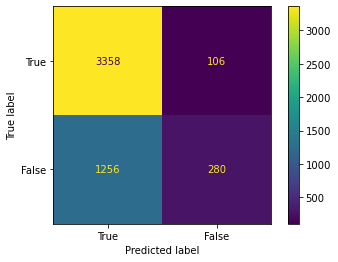

In [111]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
conf_matrix = confusion_matrix(pred_m1, data_test.default)
ConfusionMatrixDisplay(conf_matrix, display_labels=['True', 'False'], cma).plot()

<AxesSubplot:>

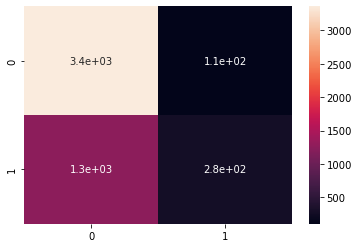

In [114]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True)

In [115]:
from sklearn.metrics import roc_curve, plot_roc_curve

fpr, tpr, _ = roc_curve(pred_m1, data_test.default)

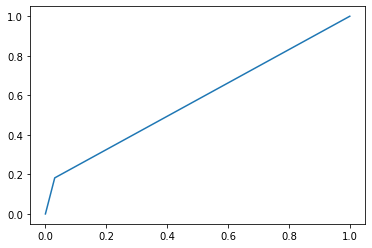

In [116]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)

C:\Users\A200083283\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\A200083283\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


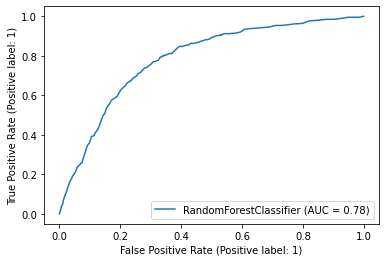

In [118]:
plot_roc_curve(clf, f_test, data_test.default)